# LOAD LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
from sklearn.cluster import KMeans

# INFORMATION ABOUT THE DATASET

In [3]:
sales_transaction = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

In [4]:
sales_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


In [5]:
sales_transaction.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [6]:
sales_transaction.tail()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00
810,P819,0,1,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33


In [7]:
sales_transaction.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.00000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,0.299149,0.287571,0.304846,0.316017,0.334760,0.314636,0.33815,0.358903,0.373009,0.427941
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,0.266993,0.256630,0.263396,0.262226,0.275203,0.266029,0.27569,0.286665,0.295197,0.342360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.085000,0.000000,0.10500,0.100000,0.110000,0.090000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,0.280000,0.270000,0.300000,0.310000,0.330000,0.310000,0.33000,0.330000,0.350000,0.430000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,0.490000,0.450000,0.500000,0.500000,0.500000,0.500000,0.50000,0.550000,0.560000,0.670000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## IDENTIFY THE NUMERIC VARIABLES

In [8]:
numeric_variable = (sales_transaction.dtypes.values != np.dtype('object')) 

In [9]:
numeric_variable

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

# COUNT MISSING VALUES

In [10]:
sales_transaction.isnull().sum()

Product_Code     0
W0               0
W1               0
W2               0
W3               0
                ..
Normalized 47    0
Normalized 48    0
Normalized 49    0
Normalized 50    0
Normalized 51    0
Length: 107, dtype: int64

In [11]:
X=sales_transaction.drop('Product_Code', axis=1)

# SCALING

Mean = 0,
Standard Deviation = 1

In [12]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [13]:
X_scaled

array([[ 0.17391867,  0.22859969,  0.04681724, ..., -0.65937251,
        -0.89151057, -0.11088975],
       [-0.15776396, -0.2492208 , -0.49011498, ..., -0.90371049,
         0.7694242 , -1.25074411],
       [-0.15776396,  0.14896294, -0.10659197, ...,  0.31797938,
         0.26097478, -0.19857085],
       ...,
       [-0.65528791, -0.72704129, -0.72022878, ..., -1.25276474,
         2.12528932,  0.94128351],
       [-0.73820856, -0.72704129, -0.72022878, ..., -1.25276474,
         2.12528932, -1.25074411],
       [-0.73820856, -0.64740454, -0.72022878, ..., -1.25276474,
        -1.26437348, -0.28625196]])

# VISUALIZATION OF THE DATASET

There is a need to reduce the number of variables to the appropriate count because plotting all the variables won't yield much information.

 ## DIMENSIONALITY REDUCTION

Dimensionality reduction will be used to plot the dataset. The dimensionality reduction is used to reduce the number of variables to the desired count without loss of information

## T-SNE - 1st Dimensionality Reduction 

In [14]:
reducer=TSNE(n_components=2, random_state=99)
reduced=reducer.fit_transform(X_scaled)
tsne_components=pd.DataFrame(reduced, columns=['tsne_1', 'tsne_2'])
tsne_components.head()

C:\Users\ogunr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ogunr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,tsne_1,tsne_2
0,1.131082,18.046867
1,0.079985,11.355897
2,-0.467774,21.012844
3,-4.724072,13.628385
4,2.946891,16.627264


# PLOTTING

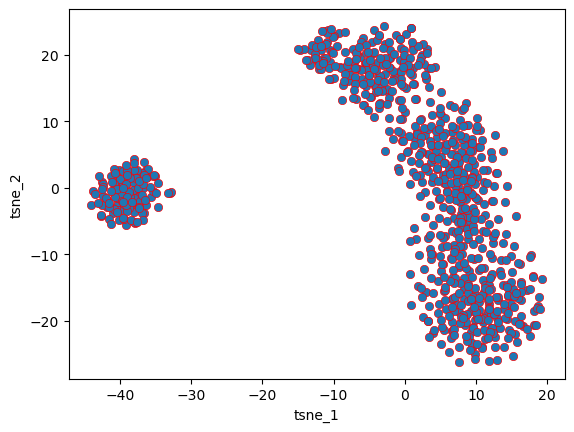

In [15]:
sns.scatterplot(x=tsne_components.tsne_1, y=tsne_components.tsne_2, edgecolor='red')
plt.show()

## PRINCIPAL COMPONENT ANALYSIS - 2nd Dimensionality Reduction 

In [16]:
pca=PCA(n_components=2)
reduced=pca.fit_transform(X_scaled)
pca_components=pd.DataFrame(reduced, columns=['PCA_l', 'PCA_2'])
pca_components.head()

,PCA_l,PCA_2
0,1.230885,1.272477
1,-1.697013,3.545676
2,2.103182,5.077004
3,0.367058,1.593169
4,0.416859,1.428319


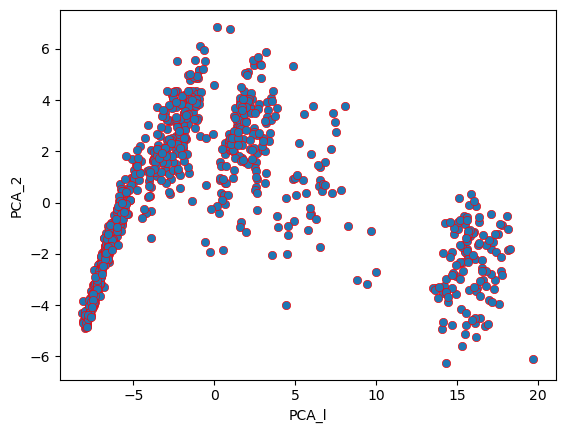

In [17]:
sns.scatterplot(x=pca_components.PCA_l, y=pca_components.PCA_2, edgecolor='red')
plt.show()

# CLUSTERING 

First is to decide the optimal number of clusters (Elbow method, Dendrogram, Silhouette, etc)

# KElbow method

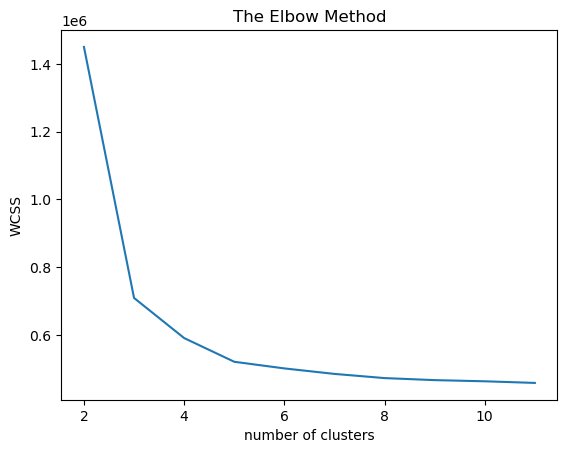

In [18]:
wcss = []
for i in range (2, 12):
    model=KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(2, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [20]:
from yellowbrick.cluster import KElbowVisualizer

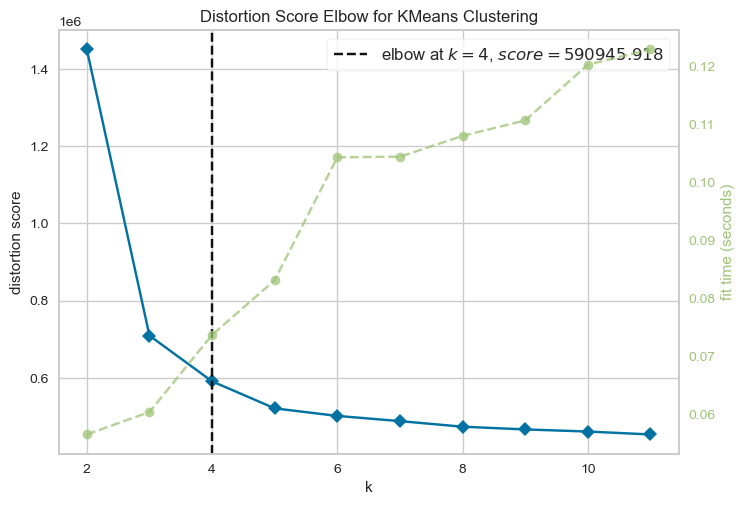

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
model=KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12))

visualizer.fit(X)
visualizer.show()

The above plot shows that 4 clusters is optimal 

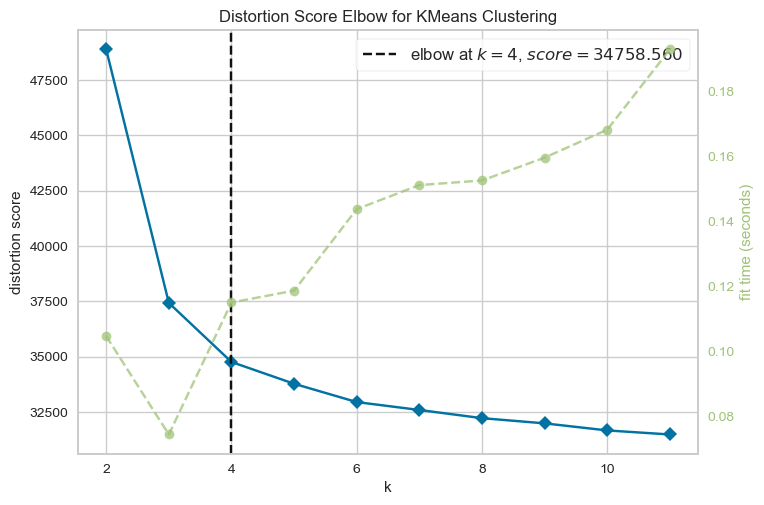

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model=KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12))

visualizer.fit(X_scaled)
visualizer.show()

For the X_scaled, 4 clusters are likewise ideal.

## OTHER METHODS TO DETERMINE THE OPTIMAL NUMBER OF CLUSTERS

# Silhouette Score Elbow Method 

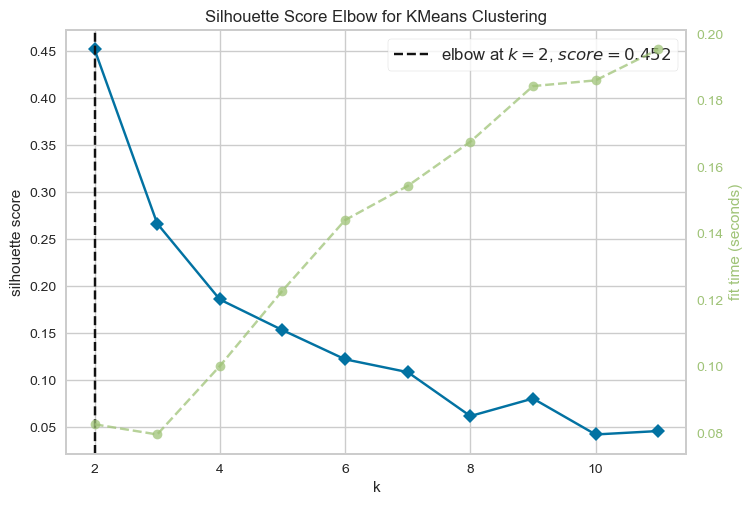

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [23]:
model=KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12), metric='silhouette')

visualizer.fit(X_scaled)
visualizer.show()

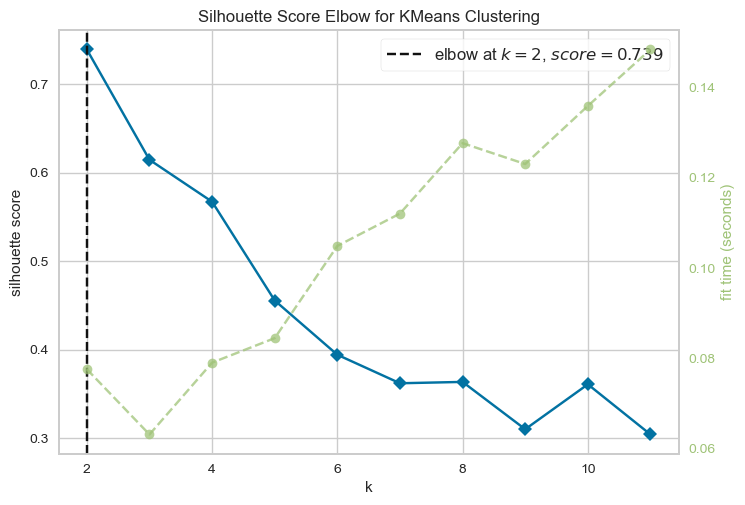

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [24]:
model=KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12), metric='silhouette')

visualizer.fit(X)
visualizer.show()

## According the Silhouette, 2 is the optimal number of clusters for both X_scaled and X

# CLUSTERING ALGORITHMS 

My goal is to utilise a clustering technique to identify the amount of items sold in the first half and second half of the year, thus I'll use two clusters to achieve that.

## KMeans

In [27]:
cluster = KMeans(n_clusters = 2, random_state = 99)
clusters = cluster.fit_predict(X_scaled)

In [31]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

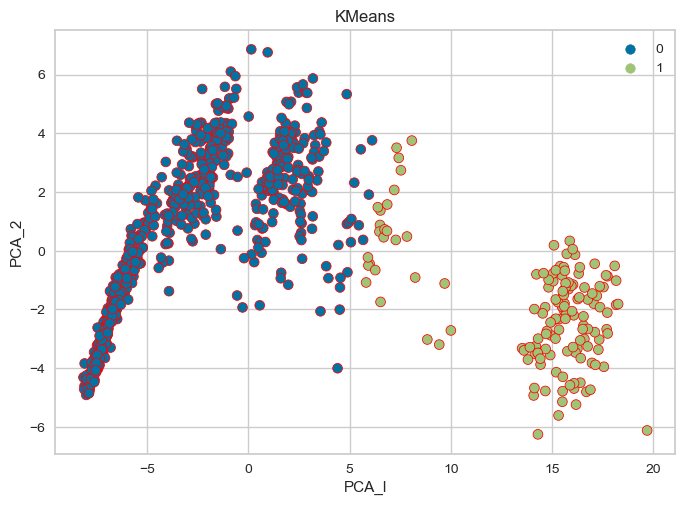

In [30]:
sns.scatterplot(x=pca_components.PCA_l, y=pca_components.PCA_2, edgecolor = 'red', hue = clusters)
plt.title('KMeans')
plt.show()

## Hierarchical Clustering 

In [32]:
from sklearn.cluster import AgglomerativeClustering 

Affinity is the metric used to compute the linkage.
The linkage criterion determines which distance to use between sets of observation. 
Ward minimizes the variance of the clusters being merged. 
Note - If linkage is 'ward', only Euclidean is accepted.

In [33]:
hei = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustershe=hei.fit_predict(X_scaled)

In [34]:
np.unique(clustershe, return_counts=True)

(array([0, 1], dtype=int64), array([691, 120], dtype=int64))

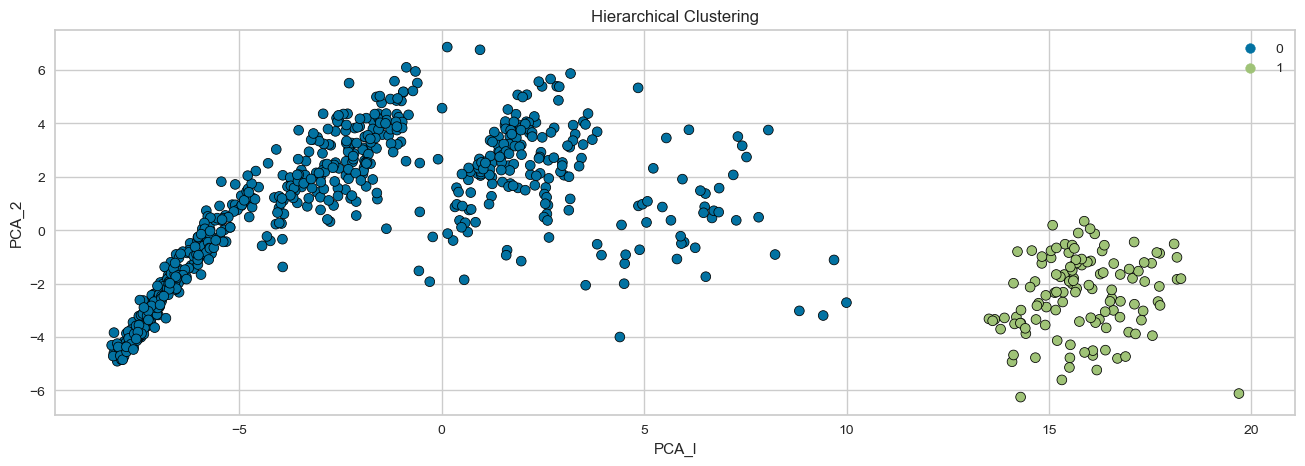

In [36]:
plt.figure(figsize=(16,5))
sns.scatterplot(x=pca_components.PCA_l, y=pca_components.PCA_2, edgecolor='black', hue=clustershe)
plt.title('Hierarchical Clustering')

plt.show()

# EVALUATION OF BOTH MODEL USING SIDE BY SIDE PLOT AND SILHOUETTE SCORE

# SIDE BY SIDE PLOT/APPERANCE

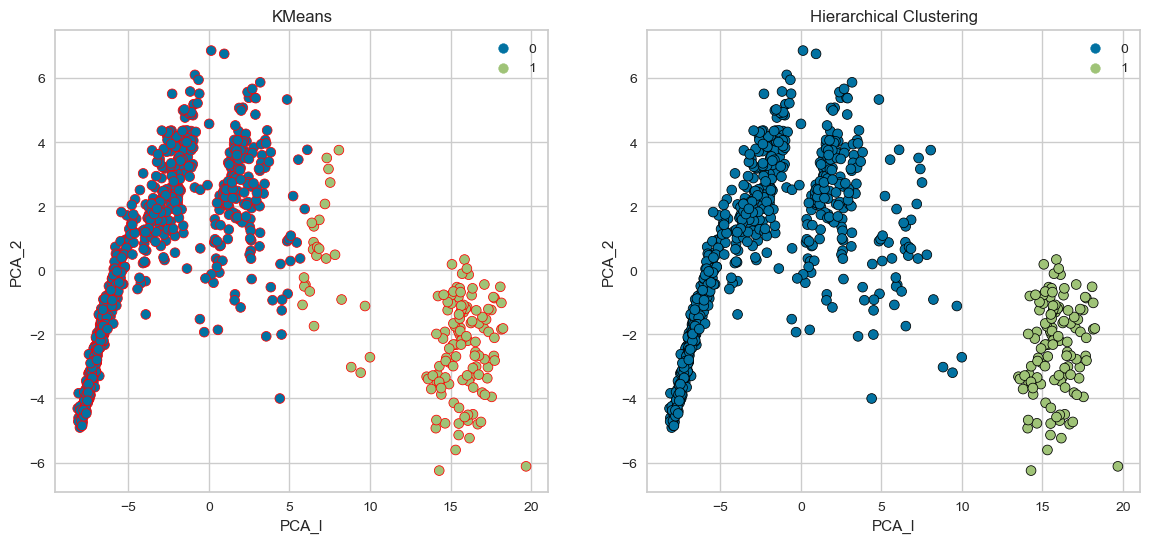

In [38]:
plt.figure(figsize=(14,6))

plt.subplot(121)
sns.scatterplot(x=pca_components.PCA_l, y=pca_components.PCA_2, edgecolor = 'red', hue = clusters)
plt.title('KMeans')

plt.subplot(122)
sns.scatterplot(x=pca_components.PCA_l, y=pca_components.PCA_2, edgecolor='black', hue=clustershe)
plt.title('Hierarchical Clustering')

plt.show()

# SILHOUETTE SCORE

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.silhouette_score(X, clusters))
print(metrics.silhouette_score(X, clustershe))

# Kmeans = 0.737129182148013
# Hierarchical = 0.7468002766993038

## HIERARCHICAL CLUSTERING PRODUCED A BETTER CLUSTERING COMPARED TO KMEANS USING THE SILHOUTTE SCORE AND ALSO BASED ON THE VISUALIZATION (SIDE BY SIDE PLOT)